In [1]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
import numpy 
import matplotlib.pyplot as plt 

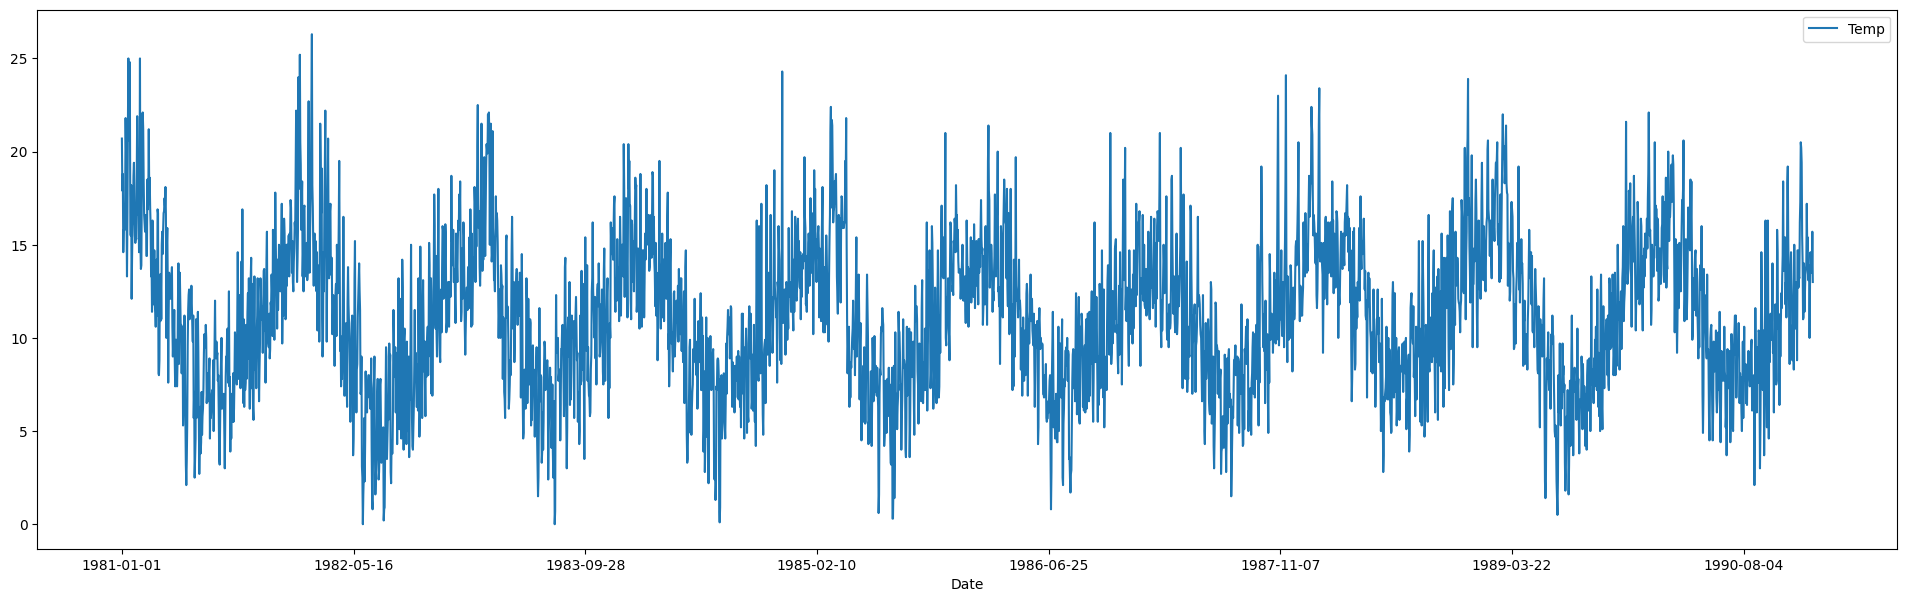

In [2]:
series = read_csv('Datasets/Data Daily Min Temperature.csv', header=0, index_col=0)
series.plot(figsize = (24, 7))
pyplot.show()

In [3]:
split_point = int(len(series) * 7 / 10)
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

Dataset 2555, Validation 1095


In [4]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [5]:
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit()
# print summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3285
Model:                 ARIMA(7, 0, 1)   Log Likelihood               -8689.286
Date:                Sat, 08 Jun 2024   AIC                          17398.571
Time:                        15:00:18   BIC                          17459.542
Sample:                             0   HQIC                         17420.401
                               - 3285                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0152      0.132      0.115      0.909      -0.244       0.275
ar.L1          1.1442      0.314      3.642      0.000       0.528       1.760
ar.L2         -0.4358      0.168     -2.594      0.0

In [7]:
differenced

array([[-3.7],
       [-2.9],
       [-5.3],
       ...,
       [ 3.1],
       [ 1.3],
       [ 0.3]])

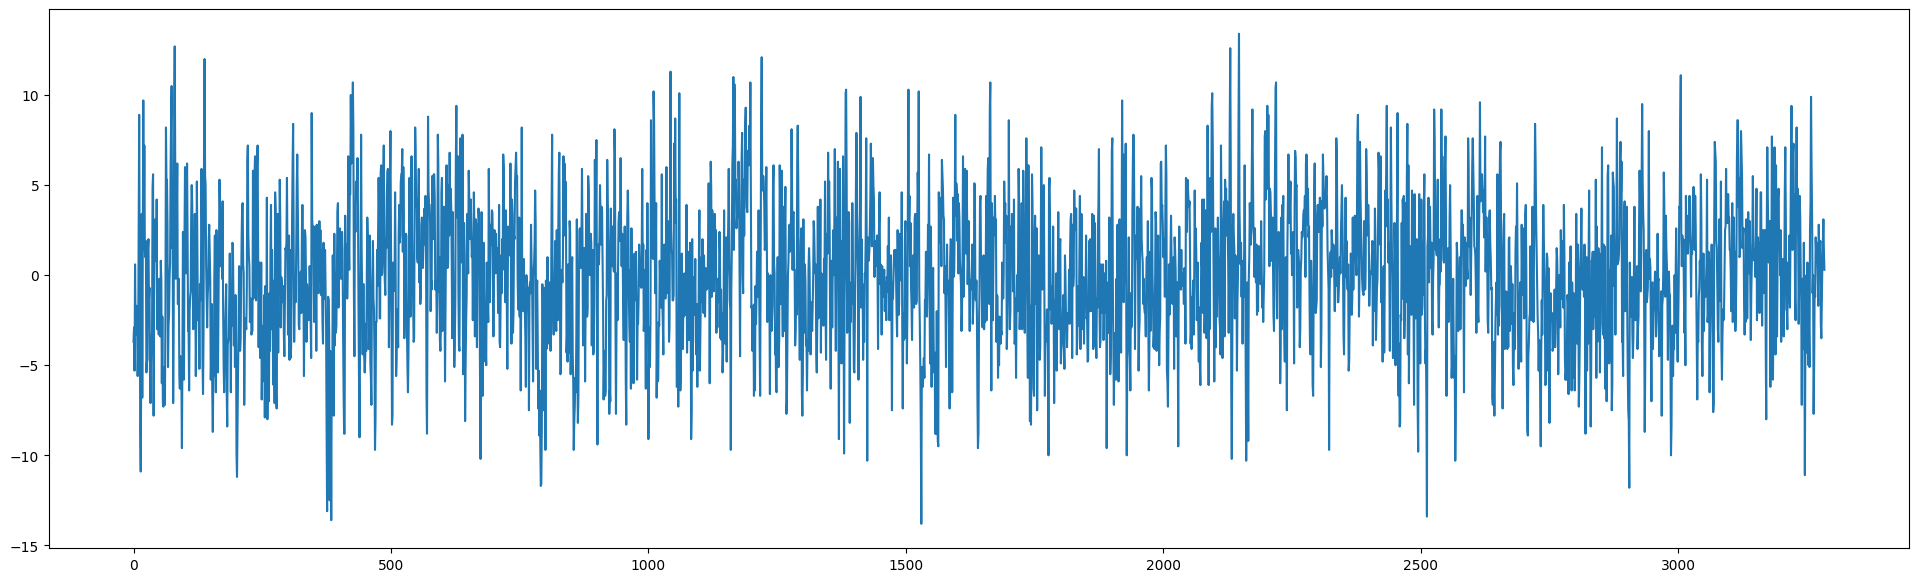

In [9]:
plt.figure(figsize = (24, 7))
plt.plot(differenced.flatten())
plt.show()

In [11]:
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]

In [12]:
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_in_year)

In [17]:
forecast

array([0.07277418, 0.09623961, 0.12383967, ..., 0.01519853, 0.01519853,
       0.01519853])

In [15]:
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=7000)
# invert the differenced forecast to something usable
history = [x for x in X]
original_history = history.copy()

day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	# inverted = yhat
	print('Day %d: %f' % (day, inverted))
	history.append([inverted])
	day += 1

Day 1: 14.872774
Day 2: 13.396240
Day 3: 15.723840
Day 4: 14.654580
Day 5: 14.475346
Day 6: 15.463134
Day 7: 16.531772
Day 8: 14.901653
Day 9: 17.480171
Day 10: 18.865950
Day 11: 22.156397
Day 12: 19.049567
Day 13: 15.544095
Day 14: 15.839290
Day 15: 14.735021
Day 16: 10.731355
Day 17: 11.528321
Day 18: 15.025864
Day 19: 14.523893
Day 20: 14.522307
Day 21: 13.321020
Day 22: 14.319968
Day 23: 14.319103
Day 24: 20.518393
Day 25: 15.017810
Day 26: 17.117333
Day 27: 16.916943
Day 28: 16.916625
Day 29: 13.616365
Day 30: 16.416153
Day 31: 16.115979
Day 32: 12.015837
Day 33: 12.215720
Day 34: 14.815625
Day 35: 14.815547
Day 36: 14.415484
Day 37: 12.915432
Day 38: 13.415389
Day 39: 15.915355
Day 40: 16.115326
Day 41: 17.615303
Day 42: 15.615284
Day 43: 15.015268
Day 44: 13.015256
Day 45: 14.115245
Day 46: 17.315237
Day 47: 15.715230
Day 48: 18.615224
Day 49: 12.715219
Day 50: 14.015216
Day 51: 13.715212
Day 52: 16.315210
Day 53: 20.015208
Day 54: 17.015206
Day 55: 15.215205
Day 56: 16.515204
D

C:\Users\Alaric\AppData\Local\Temp\ipykernel_7656\629849321.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.plot(numpy.array(history).flatten(), alpha = 1.0, label = "Prediction", color = "orange")


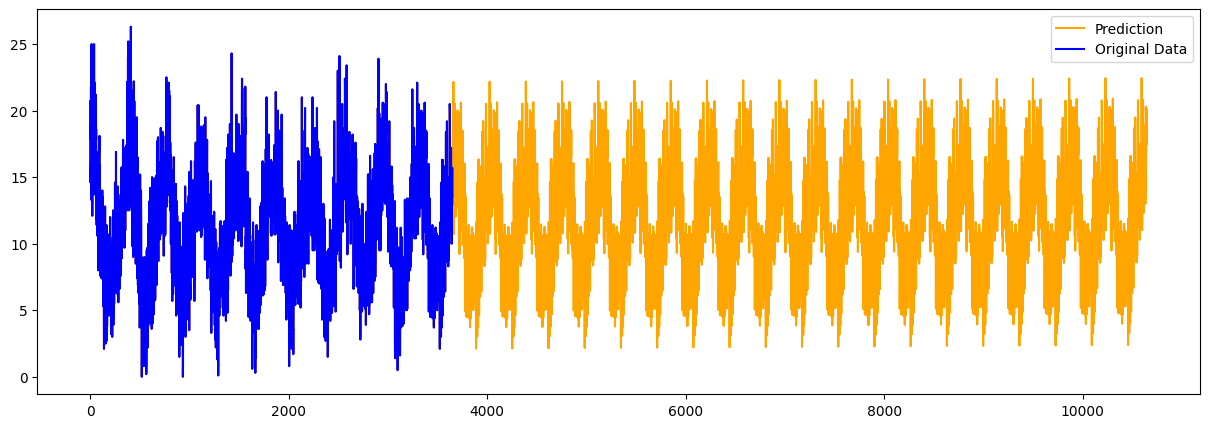

In [18]:
plt.figure(figsize=(15, 5))
plt.plot(numpy.array(history).flatten(), alpha = 1.0, label = "Prediction", color = "orange")
plt.plot(original_history, alpha = 1.0, label = "Original Data", color = "blue")
plt.legend()
plt.show()